In [4]:
!test -e /usr/local/lib/*/dist-packages/google/colab && rm -rf files.zip data tests LabNotebook.ipynb
!test -e /usr/local/lib/*/dist-packages/google/colab && wget https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/files.zip > log.txt 2>&1
!test -e /usr/local/lib/*/dist-packages/google/colab && unzip files.zip >> log.txt 2>&1
!test -e /usr/local/lib/*/dist-packages/google/colab && pip install otter-grader >> log.txt 2>&1

In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("LabNotebook.ipynb")

# Assignment 6: Visualizing Data

In this assignment we will visualize data using `matplotlib` and `plotly` libraries, which are the visualization libraries that underlies the `datascience` library. Run the cell below to import the libraries needed for this assignment. Note that we are also specifying that we would like graphs to be drawn inline in the notebook.

In [6]:
import numpy as np
from datascience import *
from datascience.predicates import *
from ipywidgets import interact, IntSlider

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter('ignore')

%matplotlib inline


Many of the pictures and descriptions in this section of the homework are taken from [Dr. Allison Horst](https://twitter.com/allison_horst) and [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php). The data was collected as a part of the [Long Term Ecological Research Network](https://lternet.edu/). If you're curious about the origins of the data, see [here](https://allisonhorst.github.io/palmerpenguins/) for more details.

## The Data

In this part of your assignment, we will explore a dataset containing size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. The data was collected by Dr. Kristen Gorman, a marine biologist from 2007 to 2009.

Here's a photo of Dr. Gorman in the wild collecting the data:

<img src='https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/gorman1.png' width=500>

Run the cell below to load in our data.

In [7]:
# Run this cell!
penguins = Table.read_table("data/penguins.csv")
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,Male
Adelie,Torgersen,39.5,17.4,186,3800,Female
Adelie,Torgersen,40.3,18,195,3250,Female
Adelie,Torgersen,36.7,19.3,193,3450,Female
Adelie,Torgersen,39.3,20.6,190,3650,Male
Adelie,Torgersen,38.9,17.8,181,3625,Female
Adelie,Torgersen,39.2,19.6,195,4675,Male
Adelie,Torgersen,41.1,17.6,182,3200,Female
Adelie,Torgersen,38.6,21.2,191,3800,Male
Adelie,Torgersen,34.6,21.1,198,4400,Male


Let's make sure we understand what each of the columns in our data represents before proceeding.

- **`"species"`** There are three species of penguin in our dataset: Adelie, Chinstrap, and Gentoo.

  <img src='https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/lter_penguins.png' width=300>

- **`"island"`** The penguins in our dataset come from three islands: Biscoe, Dream, and Torgersen. An image of these islands can be found [here](https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0090081.g001).

- **`"bill_length_mm"`** and **`"bill_depth_mm"`**: See the illustration below.
  
  <img src='https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/culmen_depth.png' width=250>

- **`"flipper_length_mm"`**: [Flippers](https://www.thespruce.com/flipper-definition-penguin-wings-385251) are the equivalent of wings on penguins. 

- **`"body_mass_g"`** The body mass of the penguin, in grams

- **`"sex"`**: The sex of the penguin

## Question 1: The [barh](http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.barh) method

The `barh` (horizontal bar chart) method is used to visualize **categorical** variable values. Categorical variables are non-numbers, like names and qualities (Color, State Names, etc.). As we saw in lecture, categorical variables come in 2 different types: *ordinal* and *nominal*. Read [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html) for further details on the difference between the two types.

The `barh` method takes in 1 mandatory argument, which is the **name of the column** you want on the left (vertical) axis of your `barh` plot. There are also optional arguments that have to do with plotting -- you'll see examples of those in this lab and in the homework. The remaining optional arguments in the `datascience` documentation linked above can also be used, feel free to try out some of the others on your own!

To use the `barh` method properly, we first need to select the columns we want to see in the graph. We should not call `barh` directly on a large `Table` because without specifying a column, we get a bar graph for every single instance of every single variable, which you can imagine results in a lot of bar graphs.


**Question 1.1.** Let's start by visualizing the distribution of the islands from which the penguins in our dataset come. A bar chart is suitable for this visualization because the island data is categorical.

First, create an `island_count` table that contains the number of penguins from each island (you can use the `group` method for this).

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1a-table.png">

Then create the bar graph, your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1a.png">



In [8]:
# create a table island_count that contains the count of the penguins on each island
island_count = penguins.group("island")
island_count

island,count
Biscoe,163
Dream,123
Torgersen,47


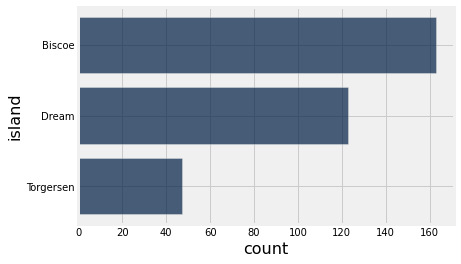

In [9]:
# Write the code to show a horizontal bar graph showing the number of penguins in each island.
island_count = penguins.group("island").barh("island")
island_count

In [10]:
grader.check("q1a")

q1a results:
    q1a - 1 result:
        ❌ Test case failed
        Trying:
            island_count.num_columns == 2 and island_count.num_rows == 3 and np.sum(island_count.column(1)) == 333
        Expecting:
            True
        **********************************************************************
        Line 1, in q1a 0
        Failed example:
            island_count.num_columns == 2 and island_count.num_rows == 3 and np.sum(island_count.column(1)) == 333
        Exception raised:
            Traceback (most recent call last):
              File "/usr/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q1a 0[0]>", line 1, in <module>
                island_count.num_columns == 2 and island_count.num_rows == 3 and np.sum(island_count.column(1)) == 333
            AttributeError: 'NoneType' object has no attribute 'num_columns'

        PYDEV DEBUGGER WARNING:
        sys.settrace() should not be used when the debugger is being used.
        This may cause the debugger to stop working correctly.
        If this is needed, please check: 
        http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
        to see how to restore the debug tracing back correctly.
        Call Location:
          File "/usr/lib/python3.7/doctest.py", line 1487, in run
            sys.settrace(save_trace)

**Question 1.2.**: Plot a horizontal bar chart that shows the number of penguins of each species. Similar to the previous question, you should first create a table that contains the number of penguins in each species.

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1b-table.png">

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1b.png">

In [11]:
# create a table species_count that contains the count of the penguins on each island
species_count = penguins.group("species")
species_count

species,count
Adelie,146
Chinstrap,68
Gentoo,119


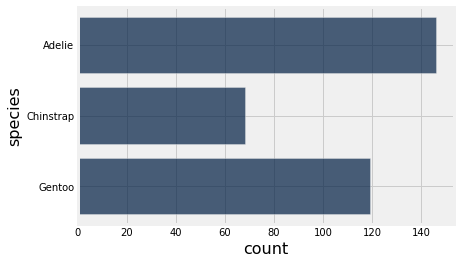

In [12]:
# Write the code to create the horizontal bar graph for the species count
species_count.barh("species")

In [13]:
grader.check("q1b")

q1b results: All test cases passed!

**Question 1.3** You want to make it easier for the user to identify the species with the highest number of penguins. Create a bar graph where the bars start from the longest at the top and the shortest at the bottom. You can use the `sort` method to sort the table by the number of penguins. The sorted table should look like below:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1c-table.png">

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1c.png">

In [14]:
# create a sorted species count table
sorted_species_count = penguins.group("species").sort("count", descending = True)
sorted_species_count

species,count
Adelie,146
Gentoo,119
Chinstrap,68


Text(0.5, 0, 'Number of Penguins')

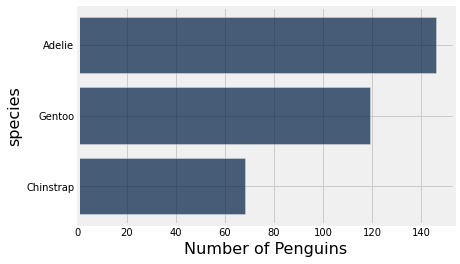

In [15]:
# Write the code to create a horizontal bar graph for the sorted count
sorted_species_count.barh("species")

# customize the x-axis label
plt.xlabel("Number of Penguins")

In [16]:
grader.check("q1c")

q1c results: All test cases passed!

**Question 1.4**: You also would like to customize the graph. Change the label of the x-axis to "Number of Penguins". Change the label of the y-axis to "Species". Change the title of the graph to "Number of Penguins by Species". Use the methods from pyplot to change the title, x-axis label, and y-axis label. 

For example, to change the x-axis label, you can use `plt.xlabel("Number of Penguins")`.

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1d.png">

Text(0.5, 1.0, 'Number of Penguin by Species')

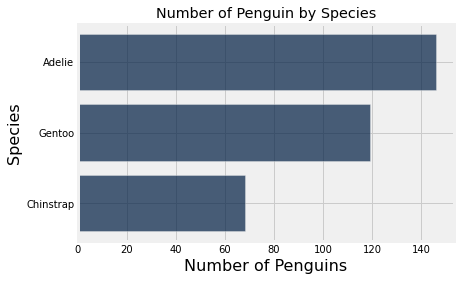

In [17]:
# add the xlabel, ylabel, and title to the plot from the previous question
sorted_species_count.barh("species")
plt.xlabel("Number of Penguins")
plt.ylabel("Species")
plt.title("Number of Penguin by Species")


### Multiple Columns 

We can also use `barh` to see multiple statistics at once. Let's use the `barh` method to see the number of male and female penguins in each island. To visualize this, it is useful to draw them side-by-side so that we can compare the numbers easily. For this we will use overlay plots discussed in [section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html).

**Question 1.5.**: Plot a horizontal bar chart that shows the number male and female penguins in each island. Hint: You can use the `pivot` method to get these numbers first (this table looks like the one below), then use `barh`.

Pivoted table:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/mf_per_island.png">

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q1e.png">


In [18]:
# use pivot to create the mf_per_island table shown in the screenshot above
mf_per_island = penguins.pivot("sex", "island")
mf_per_island

island,Female,Male
Biscoe,80,83
Dream,61,62
Torgersen,24,23


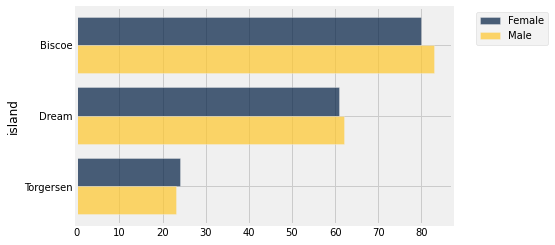

In [19]:
# use the mf_per_island table to create the horizontal bar graph
mf_per_island.barh("island")

In [20]:
grader.check("q1e")

q1e results: All test cases passed!
q1e - 1 message: Good job!

If you set the optional `overlay` argument to `False`, a separate graph will be created for each of set of data. The default value of `overlay` is `True`, so if you don't give it a value, you will get a plot with all the included variables at once.

In this case, what additional information do we get from an overlaid plot vs two separate plots? Can you think of a case where we might want to have two separate plots instead of one overlaid plot? (Hint: think about the units for both variables — are they the same or different?)

### Interactive Visualizations

If you are working with an interactive notebook, you can use the interactive visualizations instead. The visualizations of the Table class can be made interactive by calling the following method:

```{python}
Table.interactive_plots()
```

The visualization will use the interactive `plotly` library instead so that you can interact with them by hovering over or clicking on the bars.

In [21]:
# example interactive plot
Table.interactive_plots()
penguins.groups(["island", "species"]).pivot("species", "island", "count", np.sum).barh("island", np.unique(penguins["species"]), width=800)

In [22]:
# Just run this cell to return to static visualization
Table.static_plots()

## Question 2: The [hist](http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) method

Great! Now that we've explored the distributions of some of the categorical variables in our dataset (species and island), it's time to study the distributions of some of the numerical variables. As covered in [Section 7.2 of the textbook](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html), we can visualize a numerical distribution by creating a histogram using the `hist` method.

The `hist` method takes in 1 mandatory argument and has several optional arguments (as is the case with `barh`, there are many other optional arguments, but here are just a few of them). 

| **Argument** | **Description** | **Type** | **Mandatory?** |
| -- | -- | -- | -- |
| `column` | Column name whose values you want on the x-axis of your plot | Column name (string) | Yes |
| `density` | If `True`, then the resulting plot will be displayed not on the count of a value, but on the density of that value in the Table | boolean | No |
| `group` | Similar to the Table method `group`, groups rows by this label before plotting | Column name (string) | No |
| `overlay` | When `False`, make a new plot for each eligible statistic in the Table | boolean | No |
| `bins` | A NumPy array of bin boundaries you want your histogram to gather data into | array | No |
| `unit` |  A name for the units of the plotted column | Column name (string) | No |

Let's take a look at the distribution of exercise sessions in different states to see how the `hist` method helps visualize numerical variables.

**Question 2.1** Create a histogram that shows the **distribution of penguin body mass (in grams)** for all the penguins in the `penguins` table. Use the bins provided below. Set `density` to `False` so that the histogram is showing the counts instead of the density.

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q2a.png">


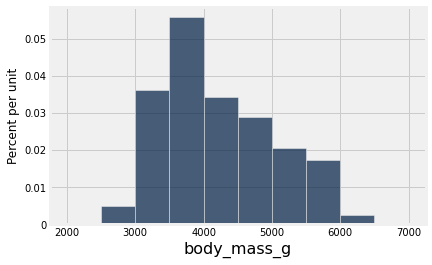

In [23]:
# setup bins of 500g each starting from 2000g, ending at 7000g
wt_bins = np.arange(2000,7001, 500) 

# Write the code that uses the bins to create a histogram
penguins.hist("body_mass_g", bins= wt_bins)

**Question 2.2.** Based on the information presented in the above histogram, assign `num_penguins` to the **number of penguins** that have a body mass **between 3000 grams (*inclusive*) and 3500 grams (*exclusive*)**.

*Note*: Remember, in a histogram, each bin is inclusive of the left endpoint and exclusive of the right endpoint. What this means is that, for example, the bin between 2500 and 3000 grams above corresponds to body masses that are greater than or equal to 2500 grams and less than 3000 grams.

In [24]:
num_penguins = 60
num_penguins

60

In [25]:
grader.check("q1b")

q1b results: All test cases passed!

**Question 2.3.**: In the cell below, write code that produces a histogram that visualizes the distribution of our penguins' flipper lengths. 

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q2c.png">

In [26]:
# create the bins
my_bins = np.arange(170, 241, 5)

# write the code that uses the bins to create a histogram
...

Ellipsis

When creating histograms, it's important to try several different bin sizes in order to make sure that we're satisfied with the level of detail (or lack thereof) in our histogram.

Run the code cell below. It will present you with a histogram of the distribution of our penguins' body masses, along with a slider for bin widths. Use the slider to try several different bin widths and look at the resulting histograms.

In [27]:
# Don't worry about the code, just play with the slider that appears after running.
def draw_mass_histogram(bin_width):
    penguins.hist('body_mass_g', bins = np.arange(2700, 6300+2*bin_width, bin_width), density = False)
    
interact(draw_mass_histogram, bin_width=IntSlider(min=25, max=2000, step=25, continuous_update=False));

interactive(children=(IntSlider(value=25, continuous_update=False, description='bin_width', max=2000, min=25, …

**Question 2.4:** In the cell below, draw two histograms using two different sized bins (bin width to **100** and **750**). Compare the output.

The first histogram should look like this:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q2d-1.png">

The second histogram should look similar to below:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q2d-2.png">


In [28]:
# Draw the histograms here, using the narrow bins
narrow_bins = np.arange(2000, 7001, 100)
...

Ellipsis

In [29]:
# Draw the histograms here, using the narrow bins
wide_bins = np.arange(2000, 7001, 500)
...

Ellipsis

**Question 2.5.** In one of the previous questions, you plotted the distribution of penguins' body mass measurements for the **entire dataset**. While doing so is important to visualize our data as a whole, we can uncover underlying patterns within our data by grouping. This process is known as **disaggregation**: separating aggregated data into its component parts.

For this question, using the `penguins` table and the `hist` table method and its various optional arguments, create the disaggregated histograms, similar to the ones shown below.

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q2e.png">

*Note*: Use the `my_bins` variable we've defined as the optional `bins` argument of the `hist` method. Use `help(penguins.hist)` to see the available optional arguments.


In [30]:
# Write the code to create the 3 separate bar graphs here. 
# Use the bins provided below.
my_bins = np.arange(2500, 6501, 500)
pen.hist("body_mass_g", my_bins)

NameError: ignored

## Question 3: [scatter](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) method

As we mentioned, visualizing two variables can show us patterns in the data that can help us learn new information. The `scatter` method allows us to see the relationship between two numerical variables in our data using a **scatter plot**. For this, we will use a different data

The first provided column name goes along the x-axis and the second goes along the y-axis.

**Question 3.1.** Use the following cell to produce a scatter plot that plots `"bill_length_mm"` on the x-axis and `"bill_depth_mm"` on the y-axis. Additionally, the scatter plot should plot **each penguin species** as its own, unique color. Your plot should look like this:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/bill_length_vs_depth.png">

*Hint*: You may find the optional arguments of the `scatter` method helpful. See the [Scatter method reference](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for more details. 

In [ ]:
# Write the code to create the scatter plot here
...

**Question 3.2.** Here's a breakdown of the plot from the previous question:
- Position on the x-axis represents bill length.
- Position on the y-axis represents bill depth.
- Color represents species, as per the legend on the right.

You'll note that there are three general "clusters" or "groups" of points, corresponding to the three penguin species. Use the scatter plot to fill in the blanks below. Both blanks should be a species of penguin.

>_"It appears that the distribution of bill lengths of Chinstrap penguins is very similar to the distribution of bill lengths of_ **[Answer for Question 3.2a]** _penguins, while the distribution of bill depths of Chinstrap penguins is very similar to the distribution of bill depths of_ **[Answer for Question 3.2b]** _penguins."_


In [ ]:
# Answer question 3.2a here
# Which penguin species has a bill length distribution similar to the Chinstrap penguins?
q3_2a = ...

In [ ]:
# Answer question 3.2B here
# Which penguin species has a bill depth distribution similar to the Chinstrap penguins?
q3_2b = ...

In [ ]:
grader.check("q3b")

**Question 3.3** While the visualization in **Question 3.1** is helpful is distinguishing between species, we lose important information -- one such feature we lose is the **sex** of the penguin. To visually compare the male and female penguins, we must do some additional digging.

In the cell below, plot a scatter plot for **only the Gentoo penguins** with `"bill_length_mm"` on the x-axis and `"bill_depth_mm"` on the y-axis, color coded by the value in the `"sex"` column. 

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q3c.png">

*Hint*: You should create a new table which only includes rows from the `penguins` table that correspond to Gentoo penguins. 


In [ ]:
# create a new table which only includes Gentoo penguins.
gentoo_penguins = ...
gentoo_penguins.show(5)

In [ ]:
# Write the code to create a scatter plot of Gentoo penguins bill length and bill depth
...

In [ ]:
grader.check("q3c")

If you've created the plot above correctly, you'll notice that male Gentoo penguins tend to have *both* longer and deeper bills.

**Question 3.4** You would also like to investigate the relationship between `"flipper_length_m"` and `"body_mass_g"` in each species. 

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q3d.png">


In [ ]:
# Write the code to create a scatter plot of flipper length and body mass for each species
...

**Question 3.5**: Based on the scatter plot above, you would like to be able to estimate a penguin's weight based on it's flipper length. To do this you can use the `fit_line` parameter of the `scatter` method.

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q3e.png">

_Hint_: remove the "group" parameter. 

In [ ]:
# Write the code to fit a line to the flipper length and body mass data 
...

**Question 3.6**: Based on the scatter plot above, what is the weight of a penguin whose flipper length is **200 mm**?

In [ ]:
# Enter the estimated weight of a penguin with 200 mm flipper length, round it to the nearest 100s.
q3_6 = ...

In [ ]:
grader.check("q3f")

## The Power of Visualizations

Look back to the scatter plot you created in **Question 4a**; we used the `"bill_length_mm"` and `"bill_depth_mm"` to produce a visualization that allows us to group the different penguin species together. This is a basic form of **clustering**, an extremely powerful tool in data science. We won't get into clustering in this class, but you may come across it in an upper level elective, such as the Machine Learning course.

Just for fun, run the following cell to produce a *three dimensional scatter plot* using the `"bill_length_mm"`, `"bill_depth_mm"`, and `"flipper_length_mm"` columns.

In [ ]:
# Just run this cell and play around with the visualization! You can zoom in and out, toggle on/off certain
# species, and move the plot around
Table.interactive_plots()
penguins.scatter3d("bill_length_mm", "bill_depth_mm", "flipper_length_mm", group="species")
Table.static_plots()

## Question 4: [plot](http://data8.org/datascience/_autosummary/datascience.tables.Table.plot.html#datascience.tables.Table.plot) method

If you want to plot two numerical variables but one of those variables corresponds to time, we can use a line plot to visualize the non-time variable as time passes.

Similar to `scatter`, we give plot the names of two numerical columns and it creates a **line plot** for us. If we want to draw multiple line plots on the same set of axes, we give it a table with multiple numerical columns, and tell it which one contains the values for the x-axis.

The `plot` method allows us to see how non-time variables change over time. Let's use `plot` to look at the Disney movie patterns over the years (the orignal data can be found [here](https://raw.githubusercontent.com/reisanar/datasets/master/disney_movies_total_gross.csv)). First, let's load the data.

In [ ]:
# Run this cell to load the movies dataset
movies = Table.read_table("data/movies.csv")
movies = movies.with_columns("decade", movies["year"]//10*10)
movies.show(5)

**Question 4.1** Plot the number of movies in each decade.

First, create a table that contains the number of movies in each decade:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4a-table.png">

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4a.png">

In [ ]:
# create a table that contains the number of movies in each decade
num_movies_decade = ...
num_movies_decade

In [ ]:
# Write the code to plot the number of movies in each decade
...

In [ ]:
grader.check("q4a")

**Question 4.2** Plot the inflation adjusted gross revenue in each decade. 

First, create a table that contains the sum of inflation adjusted gross and total gross total for each decade:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4b-table.png">

Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4b.png">

In [ ]:
# create a table that contains the sum of inflation adjusted gross and total gross total for each decade
gross_revenue_decade = ...
gross_revenue_decade

In [ ]:
# Write the code to plot the inflation adjusted gross revenue in each decade. 
...

In [ ]:
grader.check("q4b")

**Question 4.3** Plot the (inflation adjusted) maximum grossing movie in each decade.

First, create a table that contains the maximum inflation adjusted and total gross total for each decade:

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4c-table.png">


Your graph should look similar to this: 

<img src="https://wsu-courses.s3.amazonaws.com/fall2022/cais105/assignment6/examples/q4c.png">


In [ ]:
# Create a table that contain the maximum inflation adjusted and total gross total for each decade:
max_grossing_decade = ...
max_grossing_decade

In [ ]:
# Write the code to plot the (inflation adjusted) maximum grossing movie in each decade.
...

In [ ]:
grader.check("q4c")

**Question 4.4** After adjustment for inflation, what was the highest grossing movie in the dataset?

In [ ]:
# Write the highest grossing movie in the dataset after adjusting for inflation
q4_4 = ...

In [ ]:
grader.check("q4d")

## Submission

Here are the steps to submit your assignment:
- Make sure that you have run all the cells in the notebook (click _Run All_ button).
- Save the notebook (click _File_ -> _Save_).
- Save the assignment into the GitHub repository, by clicking on the _Source Control_ icon ![](https://wsu-courses.s3.amazonaws.com/fall2022/cais105/source-control-icon.png) and do the steps below:
    1. Enter a comment in the commit message field
    2. Click the _Commit_ button (click "Yes" if asked if you want to stage the files and commit all changes)
    3. Click _Sync Changes_ button
     
    ![](https://wsu-courses.s3.amazonaws.com/fall2022/cais105/step1-step2.png) 


    ![](https://wsu-courses.s3.amazonaws.com/fall2022/cais105/step3.png)

- After the changes are in GitHub, submit the link to the repository in PLATO through the assignment submission page. You can find the list of all of your repositories in this class [here](https://github.com/cais105-fall2022). Make sure that you verify that the files are correctly pushed into GitHub before you submit this link in PLATO (you can view the notebook content in read-only mode in GitHub). 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()